In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
df = pd.read_csv("material.csv")
print("Shape:", df.shape)
df.head()


Shape: (1552, 8)


,Material,Su,Sy,E,G,mu,Ro,Use
0,ANSI Steel SAE 1015 as-rolled,421,314,207000,79000,0.3,7860,True
1,ANSI Steel SAE 1015 normalized,424,324,207000,79000,0.3,7860,True
2,ANSI Steel SAE 1015 annealed,386,284,207000,79000,0.3,7860,True
3,ANSI Steel SAE 1020 as-rolled,448,331,207000,79000,0.3,7860,True
4,ANSI Steel SAE 1020 normalized,441,346,207000,79000,0.3,7860,True


In [3]:
print(df.isnull().sum())


Material    0
Su          0
Sy          0
E           0
G           0
mu          0
Ro          0
Use         0
dtype: int64


In [4]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Material  1552 non-null   object 
 1   Su        1552 non-null   int64  
 2   Sy        1552 non-null   int64  
 3   E         1552 non-null   int64  
 4   G         1552 non-null   int64  
 5   mu        1552 non-null   float64
 6   Ro        1552 non-null   int64  
 7   Use       1552 non-null   bool   
dtypes: bool(1), float64(1), int64(5), object(1)
memory usage: 86.5+ KB
None


In [5]:
print(df.describe())


                Su           Sy              E              G           mu  \
count  1552.000000  1552.000000    1552.000000    1552.000000  1552.000000   
mean    572.753222   387.010309  164571.520619   85598.840206     0.302977   
std     326.834927   289.482497   56135.405867  125326.800138     0.024590   
min      69.000000    28.000000   73000.000000   26000.000000     0.200000   
25%     340.000000   205.000000  105000.000000   40000.000000     0.300000   
50%     500.000000   305.000000  206000.000000   79000.000000     0.300000   
75%     705.000000   470.000000  206000.000000   80000.000000     0.320000   
max    2220.000000  2048.000000  219000.000000  769000.000000     0.350000   

                Ro  
count  1552.000000  
mean   6929.843428  
std    2115.171710  
min    1750.000000  
25%    7160.000000  
50%    7860.000000  
75%    7860.000000  
max    8930.000000  


In [6]:
print(df.nunique())


Material    1460
Su           309
Sy           286
E             43
G             33
mu            11
Ro            35
Use            2
dtype: int64


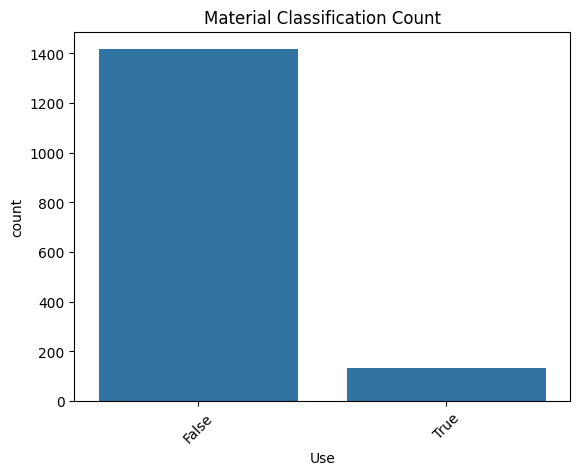

In [8]:
sns.countplot(x="Use", data=df)
plt.title("Material Classification Count")
plt.xticks(rotation=45)
plt.show()

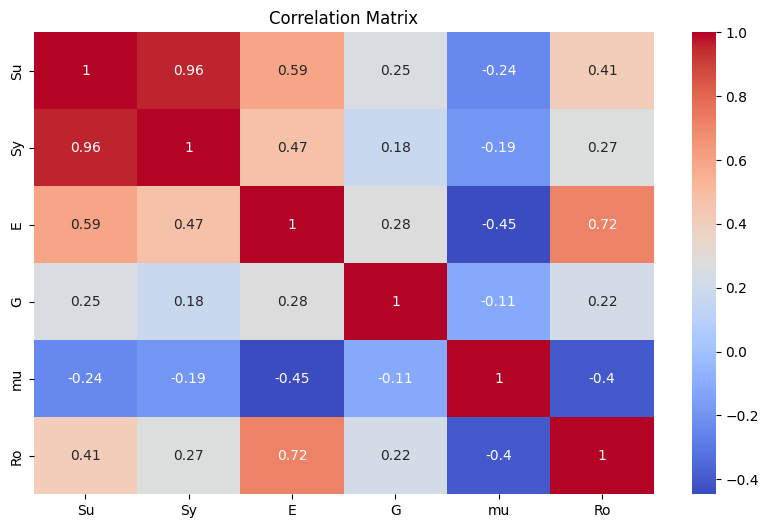

In [10]:
plt.figure(figsize=(10,6))
numerical_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

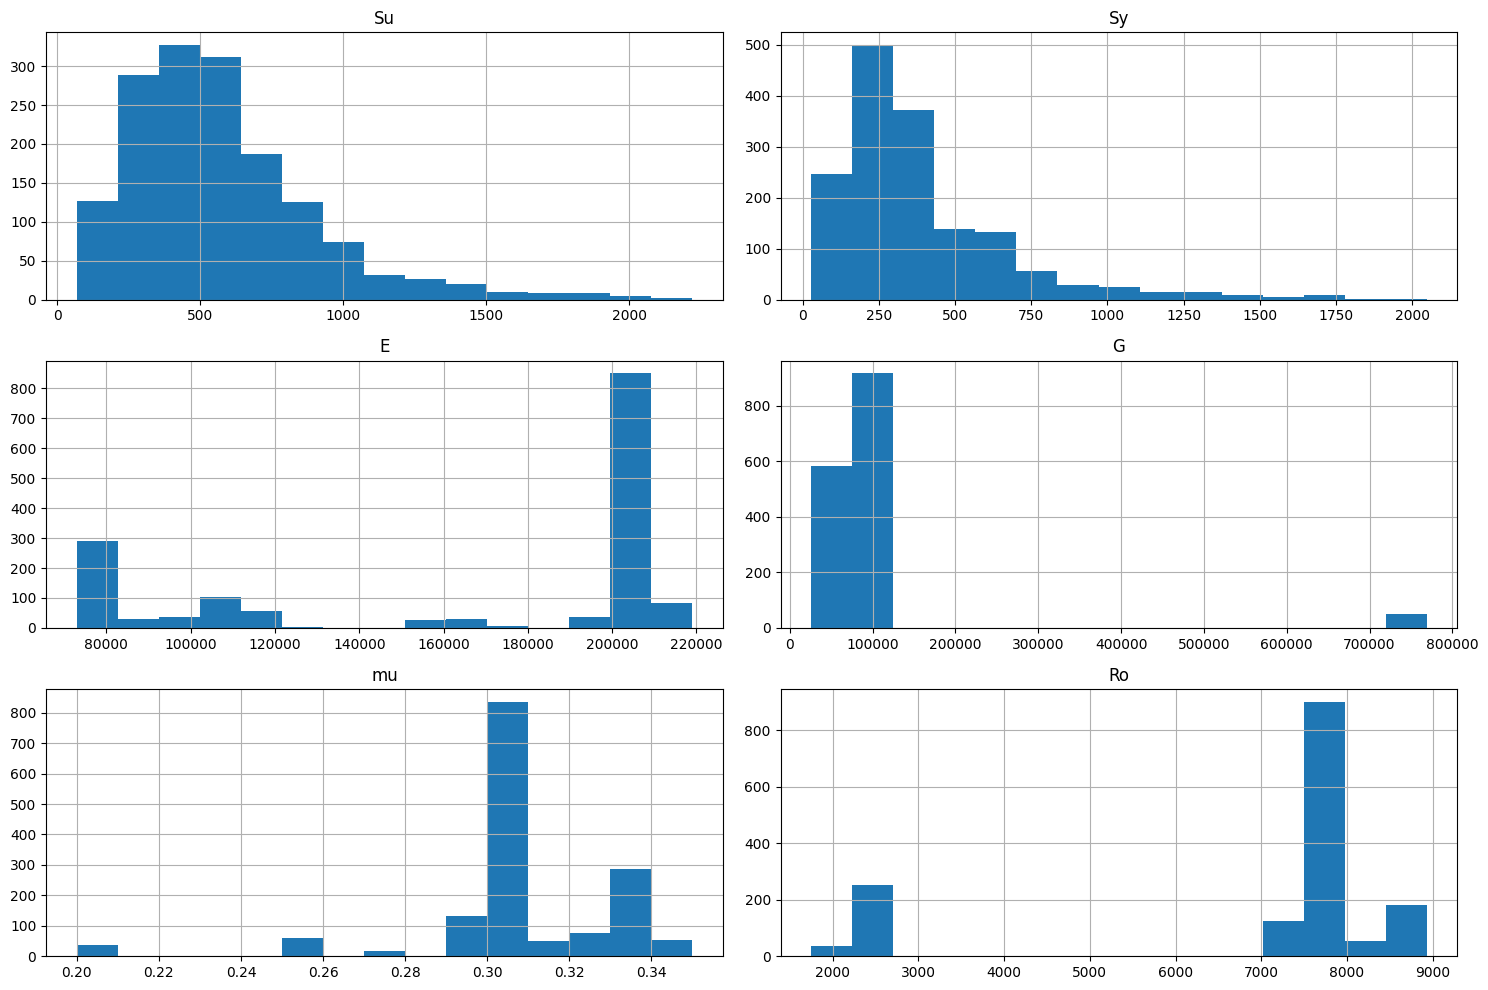

In [11]:
numerical_cols = df.select_dtypes(include=["float64", "int64"]).columns
df[numerical_cols].hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()


In [13]:
le = LabelEncoder()
df['classification'] = le.fit_transform(df['Use'])

In [16]:
X = df.drop(["classification", "Material"], axis=1)
y = df["classification"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [19]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=[str(c) for c in le.classes_]))

Confusion Matrix:
 [[285   0]
 [  0  26]]

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       285
        True       1.00      1.00      1.00        26

    accuracy                           1.00       311
   macro avg       1.00      1.00      1.00       311
weighted avg       1.00      1.00      1.00       311



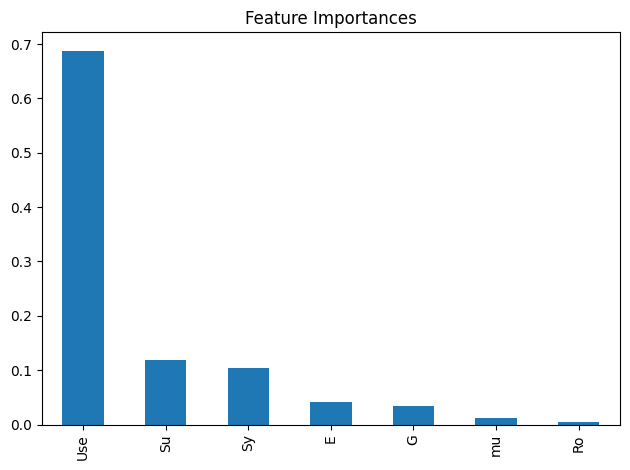

In [20]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar')
plt.title("Feature Importances")
plt.tight_layout()
plt.show()
